In [1]:
import pandas as pd
df_apl_et_pauvrete = pd.read_csv("../../data/preprocessed/apl-et-pauvrete/apl_et_pauvrete.csv",sep=";")
df_apl_et_pauvrete

,code,libelle,apl_generaliste,taux_pauvrete
0,01004,Ambérieu-en-Bugey,3.0,11.1
1,01033,Valserhône,1.8,13.0
2,01034,Belley,3.3,12.5
3,01072,Ceyzériat,3.0,7.4
4,01093,Châtillon-sur-Chalaronne,2.0,8.0
...,...,...,...,...
1414,97225,Saint-Pierre,2.7,31.5
1415,97228,Sainte-Marie,3.5,34.0
1416,97404,L'Étang-Salé,3.7,27.3
1417,97414,Saint-Leu,5.0,43.3


In [2]:
df_apl_et_pauvrete[["taux_pauvrete", "apl_generaliste"]].describe()

,taux_pauvrete,apl_generaliste
count,1419.000000,1419.000000
mean,12.919098,3.228823
std,4.823451,0.914864
min,5.000000,0.100000
25%,9.250000,2.600000
50%,12.600000,3.200000
75%,15.900000,3.700000
max,43.300000,8.500000


In [3]:
df_filtered = df_apl_et_pauvrete[
    (df_apl_et_pauvrete["apl_generaliste"] >= 1) &
    (df_apl_et_pauvrete["apl_generaliste"] <= 6) &
    (df_apl_et_pauvrete["taux_pauvrete"] >= 5) &
    (df_apl_et_pauvrete["taux_pauvrete"] <= 30)
]


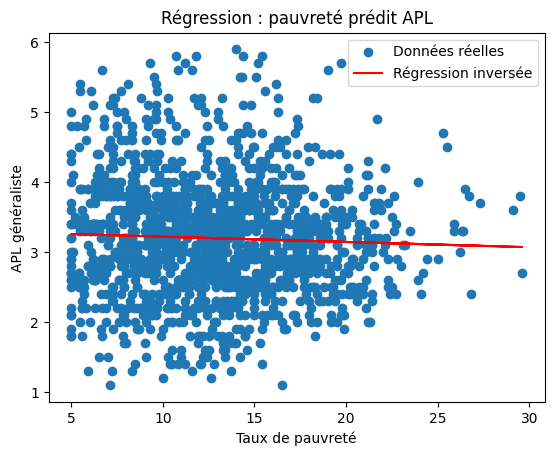

Coefficient (pente) : -0.007527856192424597
Intercept : 3.300068156457252
Score R² : 0.0016588654309471762


In [4]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = df_filtered[["taux_pauvrete"]]
y = df_filtered["apl_generaliste"]

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(X, y, label="Données réelles")
plt.plot(X, y_pred, color="red", label="Régression inversée")
plt.xlabel("Taux de pauvreté")
plt.ylabel("APL généraliste")
plt.title("Régression : pauvreté prédit APL")
plt.legend()
plt.show()

print("Coefficient (pente) :", model.coef_[0])
print("Intercept :", model.intercept_)
print("Score R² :", model.score(X, y))


## 🔄 Bilan régression inversée : Taux de pauvreté → APL

- **Objectif** : Estimer si le taux de pauvreté d’une commune peut prédire son niveau d’accessibilité aux soins (APL).
- **Modèle** : Régression linéaire simple (pauvreté → APL)

### 🔢 Résultats

- **Coefficient (pente)** : -0.0075
- **Intercept** : 3.30
- **Score R²** : 0.0017

### 🧠 Interprétation

- La **relation est quasi nulle** : le taux de pauvreté **explique moins de 0.2 %** de la variation de l’APL.
- Le coefficient négatif suggère une **légère tendance inverse** (plus de pauvreté → accessibilité un peu plus faible), mais **l'effet est négligeable**.

### 📌 Conclusion

Le taux de pauvreté, pris seul, **n'est pas un bon prédicteur de l’accessibilité aux soins** (APL).  
Pour aller plus loin, il serait pertinent :
- d’**ajouter des variables socio-économiques complémentaires** (revenu, emploi, âge, etc.)
- ou de tester des **modèles plus complexes ou multi-variables**
